In [2]:
"""
描述: 根据工年预测工资
参考: https://www.kaggle.com/code/ybifoundation/simple-linear-regression/notebook
"""

import pandas as pd

df = pd.read_csv('./data/salary_data.csv')
X = df['Experience Years'].values.reshape(-1, 1) # 转为列向量
y = df['Salary'].values.reshape(-1, 1) / 10000

# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X)

def plot_sample_data(X, y):
    import matplotlib.pyplot as plt
    plt.scatter(X, y, color='blue')
    plt.xlabel('Experience Years')
    plt.ylabel('Salary')
    plt.title('Salary vs Experience Years')
    plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [8]:
import torch
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)
    
    def predict(self, x):
        return self.forward(x) * 10000
    

input_dim = X_train.shape[1]
output_dim = 1
model = LinearRegression(input_dim, output_dim)
criteria = nn.MSELoss()
learning_rate = 0.01
iterations = 10000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = torch.from_numpy(X_train).float()
labels = torch.from_numpy(y_train).float()

for i in range(iterations):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criteria(outputs, labels)
    loss.backward() # compute gradients
    optimizer.step() # update weights
    if i % 1000 == 0:
      print('epoch {}, loss {}'.format(i, loss.item()))

epoch 0, loss 96.38822937011719
epoch 1000, loss 0.2845848798751831
epoch 2000, loss 0.284421443939209
epoch 3000, loss 0.28442123532295227
epoch 4000, loss 0.28442123532295227
epoch 5000, loss 0.28442123532295227
epoch 6000, loss 0.28442123532295227
epoch 7000, loss 0.28442123532295227
epoch 8000, loss 0.28442123532295227
epoch 9000, loss 0.28442123532295227


In [7]:
# 打印模型参数和截距
model.linear.weight, model.linear.bias

(Parameter containing:
 tensor([[0.9510]], requires_grad=True),
 Parameter containing:
 tensor([2.6125], requires_grad=True))

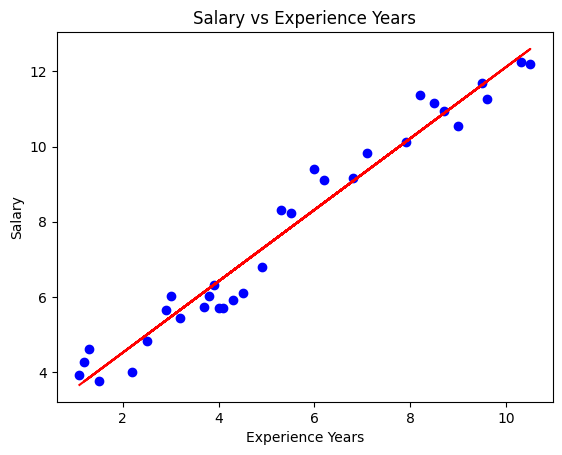

In [8]:
# 绘制线性回归的结果
def plot_linear_regression(X, y):
    import matplotlib.pyplot as plt
    plt.scatter(X, y, color='blue')
    plt.plot(X, model(torch.from_numpy(X).float()).detach().numpy(), color='red')
    plt.xlabel('Experience Years')
    plt.ylabel('Salary')
    plt.title('Salary vs Experience Years')
    plt.show()


plot_linear_regression(X_train, y_train)

In [9]:
# 使用测试数据集评估模型
inputs = torch.from_numpy(X_test).float()
labels = torch.from_numpy(y_test).float()
outputs = model(inputs)
loss = criteria(outputs, labels)
print('loss on test data', loss.item())

loss on test data 0.3176530599594116


In [20]:
# 根据工作年限预测工资
years = 5
salary = model.predict(torch.tensor([years]).float())
salary.item()

73674.25